In [185]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install apyori
df = pd.read_csv("/content/Jan_2021_Grocery_Data.csv")

In [186]:
df.shape

(5163, 3)

In [187]:
df.describe()

,Member_number
count,5.163000e+03
mean,2.120016e+09
std,4.967949e+02
min,2.120015e+09
25%,2.120015e+09
50%,2.120016e+09
75%,2.120016e+09
max,2.120016e+09


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5163 entries, 0 to 5162
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Member_number    5163 non-null   float64
 1   Date             5163 non-null   object 
 2   itemDescription  5163 non-null   object 
dtypes: float64(1), object(2)
memory usage: 121.1+ KB


In [189]:
df.notnull().sum()

Member_number      5163
Date               5163
itemDescription    5163
dtype: int64

In [190]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [191]:
df.head()

,Member_number,Date,itemDescription
0,2.120015e+09,01/01/2021,Beverage
1,2.120015e+09,01/01/2021,Bread
2,2.120015e+09,01/01/2021,Bread
3,2.120015e+09,01/01/2021,Water
4,2.120015e+09,01/01/2021,Milk


In [192]:
#setting index as Date
df.set_index('Date',inplace = True)

In [193]:
df.head()

,Member_number,itemDescription
Date,,
01/01/2021,2.120015e+09,Beverage
01/01/2021,2.120015e+09,Bread
01/01/2021,2.120015e+09,Bread
01/01/2021,2.120015e+09,Water
01/01/2021,2.120015e+09,Milk


In [194]:
#converting date into a particular format
df.index=pd.to_datetime(df.index)

<ipython-input-194-195e44b49bef>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.index=pd.to_datetime(df.index)


In [195]:
df.head()

,Member_number,itemDescription
Date,,
2021-01-01,2.120015e+09,Beverage
2021-01-01,2.120015e+09,Bread
2021-01-01,2.120015e+09,Bread
2021-01-01,2.120015e+09,Water
2021-01-01,2.120015e+09,Milk


In [196]:
df.shape

(5163, 2)

In [197]:
#gathering information about products
total_item = len(df)
total_days = len(np.unique(df.index.date))
total_months = len(np.unique(df.index.year))
print(total_item,total_days,total_months)

5163 31 1


<ipython-input-198-3c0965494389>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.itemDescription.value_counts().head(20).index, y = df.itemDescription.value_counts().head(20).values, palette = 'gnuplot')


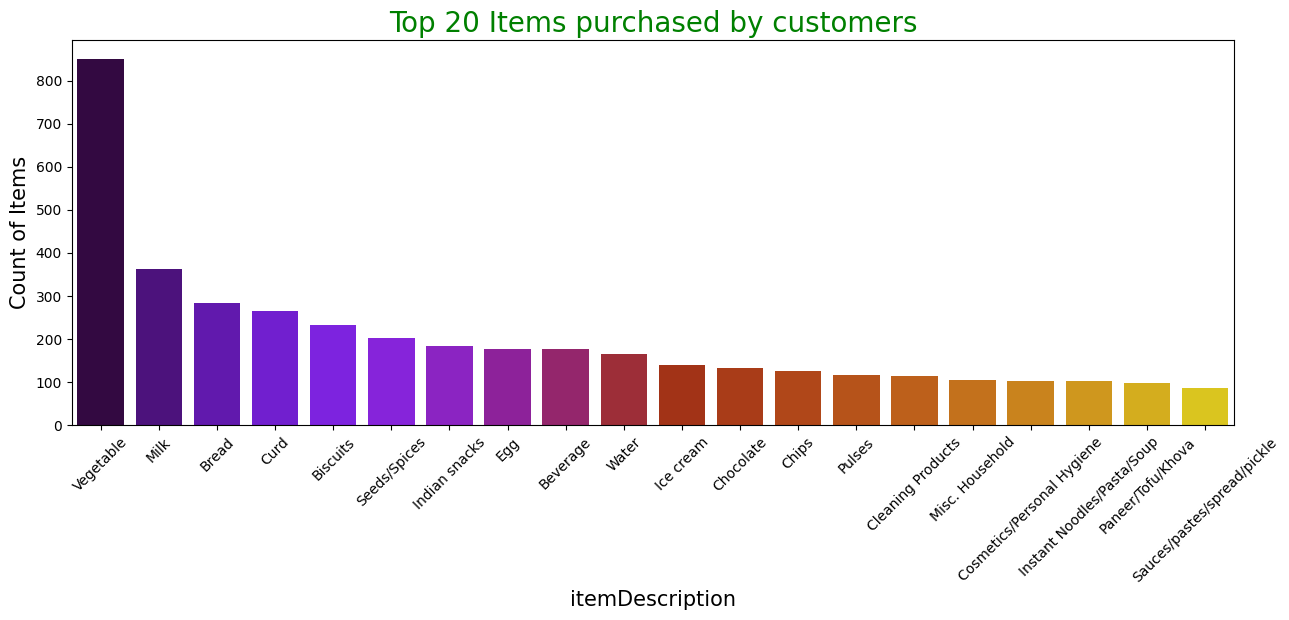

In [198]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.itemDescription.value_counts().head(20).index, y = df.itemDescription.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('itemDescription', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

In [199]:
df['itemDescription'].value_counts()

Vegetable                      851
Milk                           363
Bread                          283
Curd                           265
Biscuits                       233
Seeds/Spices                   203
Indian snacks                  184
Egg                            177
Beverage                       176
Water                          165
Ice cream                      139
Chocolate                      134
Chips                          127
Pulses                         116
Cleaning Products              114
Misc. Household                105
Cosmetics/Personal Hygiene     103
Instant Noodles/Pasta/Soup     102
Paneer/Tofu/Khova               97
Sauces/pastes/spread/pickle     87
Cooking Oil                     86
Dry fruits/nuts                 85
Other Groceries                 82
Idli/Dosa Batter                81
Rice                            77
Sugar                           58
Butter                          57
Wheat                           56
Stationary          

In [200]:
#grouping dataset to form a list of products bought by same customer on same date
df=df.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))

In [201]:
df.head(10)

Member_number  Date      
2.120015e+09   2021-01-01                                           [Beverage]
               2021-01-01                                              [Bread]
               2021-01-01                                              [Bread]
               2021-01-01                                        [Water, Milk]
               2021-01-01                                  [Paneer/Tofu/Khova]
               2021-01-01                                                [Egg]
               2021-01-01                                              [Sugar]
               2021-01-01        [Cleaning Products, Paneer/Tofu/Khova, Sugar]
               2021-01-01    [Instant Noodles/Pasta/Soup, Instant Noodles/P...
               2021-01-01    [Vegetable, Cosmetics/Personal Hygiene, Bread,...
Name: itemDescription, dtype: object

In [202]:
#apriori takes list as an input, hence converting dtaset to a list
transactions = df.values.tolist()
transactions[:10]

[['Beverage'],
 ['Bread'],
 ['Bread'],
 ['Water', 'Milk'],
 ['Paneer/Tofu/Khova'],
 ['Egg'],
 ['Sugar'],
 ['Cleaning Products', 'Paneer/Tofu/Khova', 'Sugar'],
 ['Instant Noodles/Pasta/Soup', 'Instant Noodles/Pasta/Soup'],
 ['Vegetable', 'Cosmetics/Personal Hygiene', 'Bread', 'Milk']]

In [ ]:
#applying apriori
from apyori import apriori
rules = apriori(transactions, min_support=0.0001,min_confidence = 0.0001,min_lift = 1,min_length = 1)
results = list(rules)
results

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
ordered_results = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])


In [ ]:
ordered_results